In [2]:
using LightGraphs, Plots, GraphPlot, Compose

In [9]:
include("ContactModels.jl")

rewire! (generic function with 1 method)

In [19]:
include("EpiSim.jl")

Main.EpiSim

In [10]:
net=covidsafe(limitmix(100^2,50),0.4)

{10000, 17114} undirected simple Int64 graph

In [11]:
function getbiggestbit(net)
    #dentify the vertices in the largest connected component of net
    cc=connected_components(net)
    bigi=0
    bign=0
    for i in 1:length(cc)
        if length(cc[i])>bign 
            bign=length(cc[i])
            bigi=i
        end
    end
    return cc[bigi]
end

getbiggestbit (generic function with 1 method)

In [14]:
net=net[getbiggestbit(net)]
ndsz=[length(neighbors(net,vert)) for vert in vertices(net)]
gplot(net, nodefillc=colorant"red",nodesize=ndsz,NODESIZE=0.10)

In [15]:
#'reasonable' parameters
epiparam=Dict()
epiparam["p0"]=1/10 #a guess - tuned to match observed data 
epiparam["q"]=1/8 #"up to" two weeks
epiparam["r0"]=1/4 #about two weeks for mild, 3-6 for severe
epiparam["nseeds"]=5 #probably too many, consider dropping.
#parameters don't change across transition point - assume about 5 undiagnosed case 
#and control the covidsafe uptake via network structure
i=8
epiparam["pop"]=100^2
#epiparam["gridsize"]=100

10000

In [20]:
netmodel=net
ndays=200
nsims=100
St,Et,It,Rt=EpiSim.episim(netmodel, epiparam, ndays, nsims)  

100.0%┣███████████████████████████████████████┫ 100/100 [00:06<00:00, 17.7 it/s]


(UInt64[0x000000000000270b 0x000000000000270b … 0x000000000000270b 0x000000000000270b; 0x000000000000270a 0x000000000000270b … 0x000000000000270b 0x000000000000270b; … ; 0x0000000000001a23 0x0000000000001b2d … 0x000000000000270a 0x0000000000001aa5; 0x0000000000001a21 0x0000000000001b22 … 0x000000000000270a 0x0000000000001a9b], UInt64[0x0000000000000003 0x0000000000000005 … 0x0000000000000004 0x0000000000000005; 0x0000000000000004 0x0000000000000005 … 0x0000000000000004 0x0000000000000004; … ; 0x0000000000000016 0x000000000000008c … 0x0000000000000000 0x0000000000000091; 0x0000000000000015 0x0000000000000088 … 0x0000000000000000 0x0000000000000088], UInt64[0x0000000000000002 0x0000000000000000 … 0x0000000000000001 0x0000000000000000; 0x0000000000000001 0x0000000000000000 … 0x0000000000000001 0x0000000000000001; … ; 0x0000000000000014 0x0000000000000043 … 0x0000000000000000 0x000000000000005c; 0x000000000000000f 0x0000000000000041 … 0x0000000000000000 0x0000000000000053], UInt64[0x000000

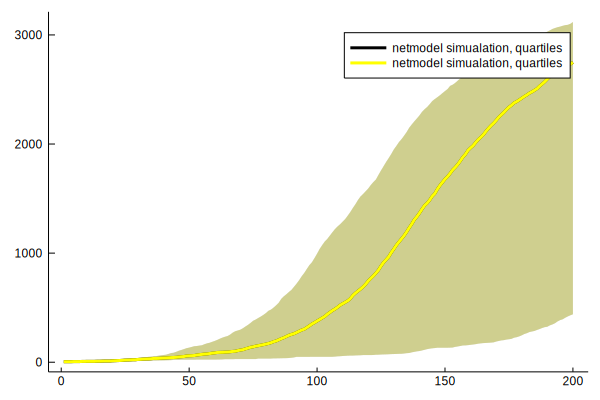

In [22]:
EpiSim.plotquantiles(epiparam["pop"] .- St,:yellow,"netmodel simualation, quartiles",0.25)